In [2]:
import os                                 
import cartopy.crs as ccrs                
import cartopy                            
import numpy as np                        
import numpy.ma as ma                     
import glob                               
import xarray as xr                       
import sys                                
import pandas as pd                       
from matplotlib import pyplot as plt             
import cmocean   
import matplotlib.colors as colors             
import matplotlib                              
import seaborn as sns                          

In [3]:
def cmap_discretize(cmap, N):                                                   
    """Return a discrete colormap from the continuous colormap cmap.            
                                                                                
        cmap: colormap instance, eg. cm.jet.                                    
        N: number of colors.                                                    
                                                                                
    Example                                                                     
        x = resize(arange(100), (5,100))                                        
        djet = cmap_discretize(cm.jet, 5)                                       
        imshow(x, cmap=djet)                                                    
    """                                                                         
                                                                                
    if type(cmap) == str:                                                       
        cmap = get_cmap(cmap)                                                   
    colors_i = np.concatenate((np.linspace(0, 1., N), (0.,0.,0.,0.)))           
    colors_rgba = cmap(colors_i)                                                
    indices = np.linspace(0, 1., N+1)                                           
    cdict = {}                                                                  
    for ki,key in enumerate(('red','green','blue')):                            
        cdict[key] = [ (indices[i], colors_rgba[i-1,ki], colors_rgba[i,ki]) for i in np.arange(N+1) ]
    # Return colormap object.                                                   
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d"%N, cdict, 1024)                                                                                

In [5]:
df1=xr.open_dataset('/home/milicak/python_tools/Analysis/mitgcm/sose/Analysis/Exp01_0_MOC_neutral.nc')                        
df2=xr.open_dataset('/home/milicak/python_tools/Analysis/mitgcm/sose/Analysis/Exp02_0_MOC_neutral.nc')                        
df3=xr.open_dataset('/home/milicak/python_tools/Analysis/mitgcm/sose/Analysis/Exp03_0_MOC_neutral.nc')                        
                                                                     
dmin = -3.0                                                          
dmax = 10.0                                                          
# divnorm = colors.TwoSlopeNorm(vmin=dmin, vcenter=0, vmax=dmax)     
divnorm = colors.DivergingNorm(vmin=dmin, vcenter=0, vmax=dmax)      
                                                                     
# cmap = plt.get_cmap('seismic',20)                                  
# cmap = plt.get_cmap('RdBu_r',21)                                   
cmap_tmp = sns.color_palette("vlag", as_cmap=True)                   
cmap = cmap_discretize(cmap_tmp, 15)                                 

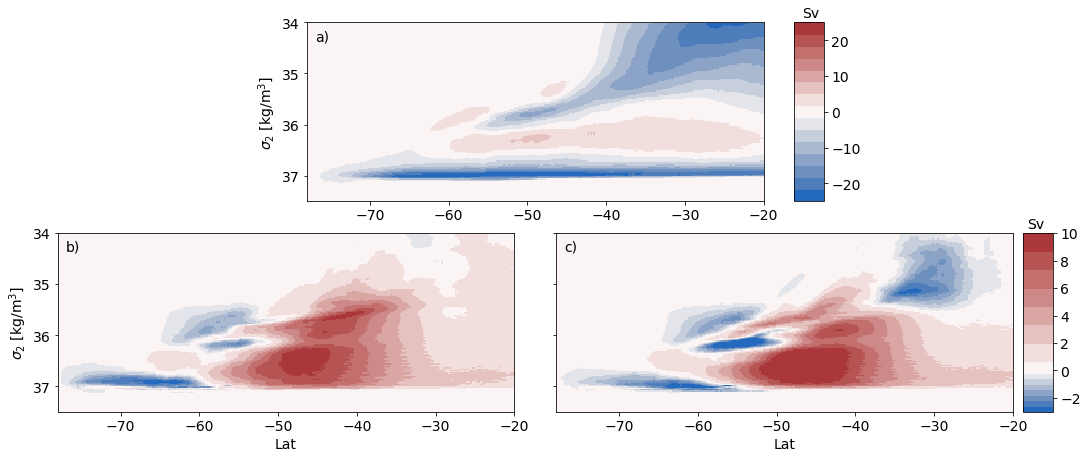

In [9]:
fig, axes = plt.subplots(figsize=(14,6))                                        
ax1 = plt.subplot2grid(shape=(2,4),loc=(0,1), colspan=2)                        
ax2 = plt.subplot2grid((2,4), (1,0), colspan=2)                                 
ax3 = plt.subplot2grid((2,4), (1,2), colspan=2)                                 
plt.tight_layout()                                                              
c1 = ax1.pcolormesh(df1.YC,df1.sigma2_bin,np.transpose(df1.vol_sigma_tr.data)*1e-6,
              shading='interp',vmin=-25,vmax=25,cmap=cmap)                      
ax1.set_xlim(-78,-20);                                                          
ax1.set_ylim(34,37.5);                                                          
axpos = ax1.get_position()                                                      
# cbar_ax = fig.add_axes([axpos.x1+0.01,axpos.y0,0.03,axpos.height])            
cbar_ax = fig.add_axes([axpos.x1+0.03,axpos.y0,0.03,axpos.height])              
cbar = fig.colorbar(c1, cax=cbar_ax, ticklocation='right')                      
ax1.tick_params(labelsize=14)                                                   
ax1.invert_yaxis()                                                              
ax1.text(-77,34.35,'a)',fontsize=14)                                            
ax1.set_ylabel('$\sigma_2$ [kg/m$^3$]',fontsize=14)                             
cbar.ax.tick_params(labelsize=14)                                               
cbar.set_label('Sv',rotation=0,y=1.09,labelpad=-50,fontsize=14)                 
                                                                                
c2 = ax2.pcolormesh(df1.YC,df1.sigma2_bin,                                      
               np.transpose(df2.vol_sigma_tr.data-df1.vol_sigma_tr.data)*1e-6,  
               shading='auto',cmap=cmap,norm=divnorm);                          
ax2.set_xlim(-78,-20);                                                          
ax2.tick_params(labelsize=14)                                                   
ax2.set_ylim(34,37.5);                                                          
ax2.invert_yaxis()                                                              
ax2.text(-77,34.35,'b)',fontsize=14)                                            
ax2.set_ylabel('$\sigma_2$ [kg/m$^3$]',fontsize=14)                             
ax2.set_xlabel('Lat',fontsize=14)                                               
                                                                                
c3 = ax3.pcolormesh(df1.YC,df1.sigma2_bin,                                      
               np.transpose(df3.vol_sigma_tr.data-df1.vol_sigma_tr.data)*1e-6,  
               shading='auto',cmap=cmap,norm=divnorm);                          
ax3.set_xlim(-78,-20);                                                          
axpos = ax3.get_position()                                                      
ax3.tick_params(labelsize=14)                                                   
ax3.set_ylim(34,37.5);                                                          
ax3.invert_yaxis()                                                              
ax3.text(-77,34.35,'c)',fontsize=14)                                            
ax3.set_xlabel('Lat',fontsize=14)                                               
ax3.set_yticklabels([]);                                                        
cbar_ax = fig.add_axes([axpos.x1+0.01,axpos.y0,0.03,axpos.height])              
cbar = fig.colorbar(c3, cax=cbar_ax)                                            
cbar.ax.tick_params(labelsize=14)                                               
cbar.set_label('Sv',rotation=0,y=1.09,labelpad=-45,fontsize=14)                 
plt.savefig('paperfigs/MOC_neutral.png', bbox_inches='tight',format='png',dpi=300)

<Figure size 432x288 with 0 Axes>